In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from collections import namedtuple 
from textblob import TextBlob
from pyspark.sql.types import *
from pyspark.sql.functions import col, lit
import pyspark.sql.functions as F
from pyspark import SparkContext,SparkConf
from pyspark.sql import SQLContext


In [2]:
conf = None
sqlContext = None 
sc  = None

In [3]:

if (conf == None):
    conf = SparkConf()
    conf.setAppName("data_viz") 
    sc =  SparkContext.getOrCreate(conf)
    sqlContext = SQLContext(sc).getOrCreate(sc)

In [4]:
def get_twitter_data_pandas():
    try:
        data_path = os.getcwd() + "/data/tweets/all_tweets.parquet"
        df = sqlContext.read.parquet(data_path).distinct()
        return df.toPandas()
    except Exception as e:
        print("Error occurred while pulling the twitter data. Error details ::" + str(e))

In [12]:
data_path = os.getcwd() + "/data/tweets/all_tweets.parquet"
df = sqlContext.read.parquet(data_path).distinct()
#df.groupBy(["sentiment_text","polarity"]).count().show()
df.show()

+-------------------+--------------------+--------------------+--------------+--------------------+--------------------+-----------+----+
|             id_str|               tweet|       cleaned_tweet|sentiment_text|            polarity|   row_add_timestamp|       date|hour|
+-------------------+--------------------+--------------------+--------------+--------------------+--------------------+-----------+----+
|1516621195688517634|English aati hai ...|English aati hai ...|       neutral|                 0.0|2022-04-19 23:39:...|20220410919|  23|
|1522386398300409856|#auspol #war #Ukr...|#auspol #war #Ukr...|      positive|                0.25|2022-05-05 21:26:...|20220512505|  21|
|1516621169809846272|"I just cannot be...|"I just cannot be...|      positive|                 0.1|2022-04-19 23:38:...|20220410919|  23|
|1522386410367590401|This just doesn’t...|This just doesn’t...|       neutral|                 0.0|2022-05-05 21:27:...|20220512505|  21|
|1516621164121976833|@Lowes_Canada

In [6]:
bins = []
for x in range(-100,110,10):
    bins.append(x/100)

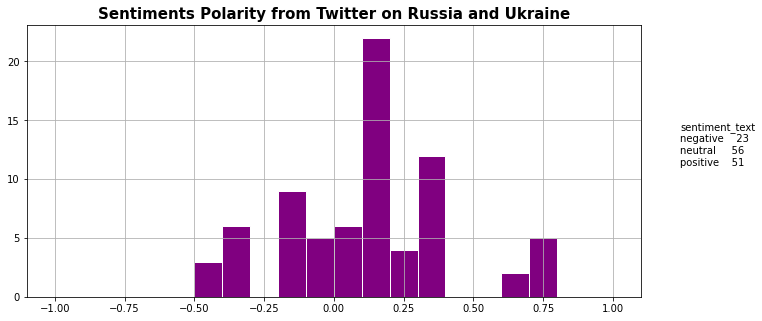

In [7]:

fig, ax = plt.subplots(figsize = (11,5))
fig.patch.set_facecolor('xkcd:white')

sentiment_df = get_twitter_data_pandas()
df = sentiment_df
plt.figtext(0.95,0.49,df['sentiment_text'].groupby(df.sentiment_text).size().to_string(), {
    'multialignment':'left'
})
sentiment_df = sentiment_df[['polarity']]
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
sentiment_df.hist(
            bins= bins,
             ax=ax,
             color="purple",
             edgecolor='white', 
             linewidth=1 
            )
ax.set_title('Sentiments Polarity from Twitter on Russia and Ukraine',fontsize=15, color= 'black', fontweight='bold')
plt.show()